<div style="text-align: right">INFO 6105 - Data Science Eng Methods and Tools</div>
<div style="text-align: right">Assignment 4</div>
<div style="text-align: right">Vignesh Kumar Baskar [002196442]</div>

**Movies with Python**

I have scripted a story and added images based upon the narration. Then added borders to the images, added subtitles to those frames, stacked the images horizontally, and then stacked those vertically. Finally animated those frames and converted it as PDF.

**Steps:**

1. Added Borders to the images
2. Added Subtitles - English and Tamil seperately in different folders
3. Stacked the images horizontally
4. Then stacked those images vertically
5. Added cartoon sytles
6. Converted to PDF files

I have executed the comic movies for both English and Tamil seperately.


Example:

**Awestruck by the view**  - English

**நான் முதல் முறையாக உண்மையில் மயக்கமடைந்தேன்** - Tamil (Regional Language)


Get Started!!

Checking the working directory and changing it to my desired workspace.

In [1]:
import os
os.getcwd()

'E:\\DAMG\\Data Science Methods and Techniques\\Assignments\\Comic_Book'

In [2]:
os.chdir(r"E:\DAMG\Data Science Methods and Techniques\Assignments\Comic_Book")
os.getcwd()

'E:\\DAMG\\Data Science Methods and Techniques\\Assignments\\Comic_Book'

Starting with **ENGLISH** Language:

*Step1: Adding borders to the list of images*

In [57]:
from PIL import Image as pili, ImageOps as piliops

path_in = r"ENG/Frames/"
path_out = r"ENG/Borders/"
list_im = os.listdir(path_in)

for files in os.listdir(path_in):
    new_path = path_in+files
    new_path_out = path_out+files
    piliops.expand(pili.open(new_path), border=(170,170),fill='blue').save(new_path_out)
    
print("Success!!")

Success!!


*Step2: Importing Subtiles from the Excell sheet 
Added both the ENG and TAMIL subtitles in the 2nd and 3rd columns.*

*Accessing those using Pandas library*

In [58]:
import pandas as pd

subs = []
df = pd.read_excel('ENG/Scripts/Script.xlsx', sheet_name='Sheet1', usecols='B')
df = df['Subtitle-ENG'].str.replace("^\['|'\]$","")
for i in df.values:
    subs.append(i)

C:\Users\Inspiron\AppData\Local\Temp/ipykernel_24916/2188234629.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df = df['Subtitle-ENG'].str.replace("^\['|'\]$","")


Checking the ENGLISH Subtitle scripts:

In [59]:
for i in subs:
    print(i)

Boston Journey
A Warm Good-bye India
Gathered with my relatives to meet-up them
Had a great with my cousin and discussed about the future
Me travelling to Bangalore Airport, India
A pic to be rembemered while at the departure to Boston
Advising my sister to concentrate on her studies
A bit emotional movement for me 
Pic with my dad before leaving my country
I was waiting in the lobby for a very long time since due to flight delay
I was travelling in Qatar Airways which routes via Doha
Due to COVID protocols, I was fully covered my face with shield
Had a chance to sit near the window
A beautiful snap from my window
I was felt unsleepy and it was so dark inside
Had a great meal along with a cup of drink
Faced a tragic moment since I missed my laptop at Doha terminal
Enquired with the airlines on the possibilites of receiving my laptop
First Snap at Boston
Initially I stayed in Mattapan -My first dinner 
Later after a week, I moved to Boylston street
Rainy day as I went to grab a burger i

*Adding the subtitle to the bordered images and saved in the FrameWithSubs Folder*

In [60]:
from PIL import Image as pili, ImageDraw as pild, ImageFont as pilf
from PIL import ImageOps

path_in = r"ENG/Borders/"
path_out = r"ENG/FrameWithSubs/"
list_im = os.listdir(path_in)
list_im.sort()
index = 0


for files in os.listdir(path_in):
    
    new_path = path_in+files
    image = pili.open(new_path)
    resize = image.resize((500,500))
    border = ImageOps.expand(resize, border=(8,8), fill=(600,400,200))
    
    TINT_COLOR = (0, 0, 0)  # Black
    TRANSPARENCY = .40      # Degree of transparency, 0-100%
    OPACITY = int(255 * TRANSPARENCY)
        
    img = border.convert('RGBA')
    overlay = pili.new('RGBA', img.size, TINT_COLOR+(0,))
    draw = pild.Draw(overlay)
    font = pilf.truetype("arial.ttf", 30)
    text = subs[index]
    w, h = font.getsize(text)
    num_lines = len(text.split('\n'))
    x, y = 10, img.height - (num_lines-0.1*num_lines)*h
    draw.rectangle((x, y, x + img.width - 200, y + (num_lines-0.1*num_lines)*h), fill=TINT_COLOR+(OPACITY,))
    draw.text((x, y), text, fill=(209, 239, 8), font=font)

    # Alpha composite these two images together to obtain the desired result.
    img = pili.alpha_composite(img, overlay)
    
    img = img.convert("RGB")   # Remove alpha for saving in jpg format.
    new_path_out = path_out+files
    img.save(new_path_out)
    index+= 1
    
print("Success!!")

Success!!


*Step3: Stacking those images horizontally*

In [61]:
import os
import numpy as np
import PIL
from os.path import isfile, join
path_in = r"ENG/FrameWithSubs/"
path_out = r"ENG/Horizontal/"
files = os.listdir(path_in)
files.sort()

pages = 1
while 0 < len(files):
    lines = 0
    print('PAGE '+str(pages))
    num_cols = old_num_cols = 0
    while lines < 6 and 0 < len(files):
        lines += 1
        while num_cols == old_num_cols:
            num_cols = np.random.randint(3, 5)
        old_num_cols = num_cols
        files_one_line = files[:num_cols]
        print(files_one_line)
        imgs_one_line = [ PIL.Image.open(path_in+i) for i in files_one_line ]
        min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs_one_line])[0][1]
        imgs_comb = np.hstack( (np.asarray(i.resize(min_shape)) for i in imgs_one_line ) )
        imgs_comb = PIL.Image.fromarray(imgs_comb)
        imgs_comb.save( path_out+str(pages)+str(lines)+'.jpg' )
        files = files[num_cols:]
    pages+=1

print("\nSuccess!!")

PAGE 1
['Frame01.jpg', 'Frame02.JPG', 'Frame03.JPG', 'Frame04.JPG']
['Frame05.JPG', 'Frame06.JPG', 'Frame07.JPG']
['Frame08.JPG', 'Frame09.JPG', 'Frame10.JPG', 'Frame11.JPG']
['Frame12.JPG', 'Frame13.JPG', 'Frame14.JPG']
['Frame15.JPG', 'Frame16.JPG', 'Frame17.JPG', 'Frame18.JPG']


C:\Users\Inspiron\AppData\Local\Temp/ipykernel_24916/783277652.py:24: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray(i.resize(min_shape)) for i in imgs_one_line ) )


['Frame19.JPG', 'Frame20.JPG', 'Frame21.JPG']
PAGE 2
['Frame22.JPG', 'Frame23.JPG', 'Frame24.JPG', 'Frame25.JPG']
['Frame26.JPG', 'Frame27.JPG', 'Frame28.JPG']
['Frame29.JPG', 'Frame30.JPG', 'Frame31.JPG', 'Frame32.JPG']
['Frame33.JPG', 'Frame34.JPG', 'Frame35.JPG']
['Frame36.JPG', 'Frame37.JPG', 'Frame38.JPG', 'Frame39.JPG']
['Frame40.JPG', 'Frame41.JPG', 'Frame42.JPG']
PAGE 3
['Frame43.JPG', 'Frame44.JPG', 'Frame45.JPG', 'Frame46.JPG']
['Frame47.JPG', 'Frame48.JPG', 'Frame49.JPG']
['Frame50.JPG', 'Frame51.JPG', 'Frame52.JPG', 'Frame53.JPG']
['Frame54.JPG', 'Frame55.JPG', 'Frame56.JPG']
['Frame57.JPG', 'Frame58.jpg', 'Frame59.jpg', 'Frame60.jpg']
['Frame61.jpg']
Success!!


*Step4: Vertically stacking those horizontal images*

In [63]:
import os
import numpy as np
import PIL
from os.path import isfile, join
path_in = r"ENG/Horizontal/"
path_out = r"ENG/Vertical/"
files = os.listdir(path_in)
files.sort()

pages = 1
while 0 < len(files):
    lines = 0
    print('page '+str(pages))
    num_cols = old_num_cols = 0
    while lines < 6 and 0 < len(files):
        lines += 1
        while num_cols == old_num_cols:
            num_cols = np.random.randint(3, 5)
        old_num_cols = num_cols
        files_one_line = files[:num_cols]
        print(files_one_line)
        imgs_one_line = [ PIL.Image.open(path_in+i) for i in files_one_line ]
        min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs_one_line])[0][1]
        imgs_comb = np.vstack( (np.asarray(i.resize(min_shape)) for i in imgs_one_line ) )
        imgs_comb = PIL.Image.fromarray(imgs_comb)
        imgs_comb.save( path_out+str(pages)+str(lines)+'.jpg' )
        files = files[num_cols:]
    pages+=1

print("\nSuccess!!")

page 1
['11.jpg', '12.jpg', '13.jpg']
['14.jpg', '15.jpg', '16.jpg', '21.jpg']


C:\Users\Inspiron\AppData\Local\Temp/ipykernel_24916/802608691.py:24: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.vstack( (np.asarray(i.resize(min_shape)) for i in imgs_one_line ) )


['22.jpg', '23.jpg', '24.jpg']
['25.jpg', '26.jpg', '31.jpg', '32.jpg']
['33.jpg', '34.jpg', '35.jpg']
['36.jpg']

Success!!


*Step5: Adding cartoon comic mix to those frames*

Defining two functions: 

1. imgcompress_mem - For compressing and resizing the image

2. cartoonizebl_mem - For adding cartoonist feature to those images by using cv2 library



In [64]:
import cv2 
def imgcompress_mem(path_in, k):
    img = cv2.imread(path_in, cv2.IMREAD_UNCHANGED)

    # set the ratio of resized image
    width = int((img.shape[1])/k)
    height = int((img.shape[0])/k)

    # resize the image by resize() function of openCV library
    return cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)

In [65]:
def cartoonizebl_mem(path_in, k, blur, line):
    
    imgc = imgcompress_mem(path_in, k)
    #imgc_pil = cv2.cvtColor(imgc, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    #display(Image.fromarray(imgc_pil))

    line_size = line
    blur_value = blur
    #imgc = cv2.imread(path_out, cv2.IMREAD_UNCHANGED)
    gray = cv2.cvtColor(imgc, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    bigedges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    bigedges_pil = cv2.cvtColor(bigedges, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    #display(Image.fromarray(bigedges_pil))

    return cv2.bitwise_and(imgc, imgc, mask=bigedges)

Calling those two function by passing the list of vertically stacked images and saving it in the Animation Folder


In [66]:
import cv2 
from IPython.display import display
import numpy as np
from PIL import Image, ImageOps

path_in = r"ENG/Vertical/"
files = os.listdir(path_in)
path_out = r"ENG/Animation/"

for image in files:
    
    new_path = path_in+image
    cblimg = cartoonizebl_mem(new_path, 1.5, 5, 5)
    cv2.imwrite(path_out+image,cblimg)
    
print("Success!!")

Now, printing out one image file to get some idea on how it actually looks.

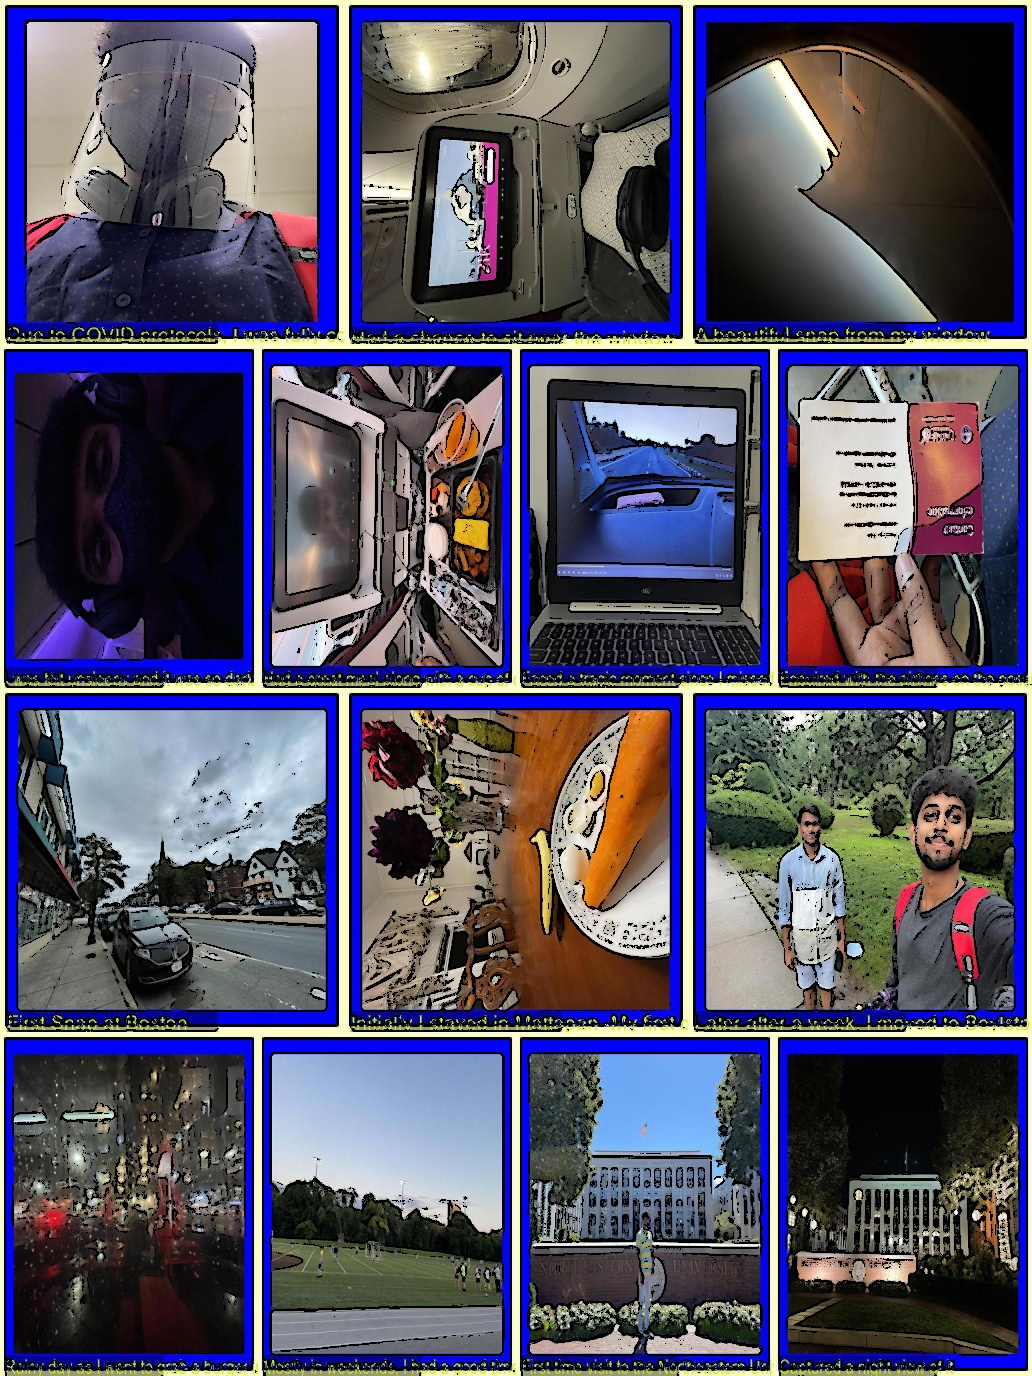

In [67]:
from IPython.display import Image
Image(filename='ENG/Animation/12.jpg')

*Step6: Converting these images to PDF file and save it in PDF folder*

In [68]:
from PIL import Image
from fpdf import FPDF

path = r"ENG/Animation/"
cover = Image.open('ENG/Animation/11.jpg')
width, height = cover.size
pdf = FPDF(unit = "pt", format = [width, height])
    
files = os.listdir(path)

for image in files:
    new_path = path+image
    pdf.add_page()
    pdf.image(new_path, 0, 0, width, height)
    
pdf.output("ENG/PDF/ComicBook_ENG.pdf", "F")
print("Success!! Your Comic book PDF version has been saved.")

Success!! Your Comic book PDF version has been saved.


Now moving on to **TAMIL** Language:

*Gonna follow the same above steps but accessing the different folder [TAMIL].*

*Step1: Adding borders to the list of images*

In [35]:
from PIL import Image as pili, ImageOps as piliops

path_in = r"TAMIL/Frames/"
path_out = r"TAMIL/Borders/"
list_im = os.listdir(path_in)

for files in os.listdir(path_in):
    new_path = path_in+files
    new_path_out = path_out+files
    piliops.expand(pili.open(new_path), border=(170,170),fill='blue').save(new_path_out)

*Step2: Importing Subtiles from the Excell sheet 
Added both the ENG and TAMIL subtitles in the 2nd and 3rd columns.*

*Accessing those using Pandas library*

In [37]:
import pandas as pd

subs_tamil = []
df1 = pd.read_excel('TAMIL/Scripts/Script.xlsx', sheet_name='Sheet1', usecols='C')
df1 = df1['Subtitle-TAMIL'].str.replace("^\['|'\]$","")
for i in df1.values:
    subs_tamil.append(i)

C:\Users\Inspiron\AppData\Local\Temp/ipykernel_24916/3989044637.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df1 = df1['Subtitle-TAMIL'].str.replace("^\['|'\]$","")


Checking the TAMIL Subtitle scripts:

In [38]:
for i in subs_tamil:
    print(i)

பாஸ்டன் ஜர்னி
ஒரு சூடான நல்ல வழி இந்தியா
அவர்களை சந்திக்க என் உறவினர்களுடன் கூடி
என் உறவினருடன் ஒரு பெரிய மற்றும் எதிர்காலத்தைப் பற்றி விவாதித்தேன்
இந்தியாவில் பெங்களூரு விமான நிலையத்திற்கு பயணம் செய்கிறேன்
பாஸ்டனுக்கு புறப்படும் போது ஒரு படம் மறுபடியும் செய்யப்பட வேண்டும்
என் சகோதரியிடம் அவரது ஆய்வுகள் மீது கவனம் செலுத்த வேண்டும்
எனக்கு ஒரு பிட் உணர்ச்சி இயக்கம்
என் நாட்டில் இருந்து என் அப்பாவுடன் படம்
விமான தாமதம் காரணமாக மிக நீண்ட காலமாக லாபியில் காத்திருந்தேன்
டூவா வழியாக வழித்தடங்கள் கத்தார் ஏர்வேஸில் பயணம் செய்தேன்
Covid நெறிமுறைகள் காரணமாக, நான் முழுமையாக கேடயம் என் முகத்தை மூடப்பட்டிருந்தது
சாளரத்திற்கு அருகில் உட்கார வாய்ப்பு கிடைத்தது
என் சாளரத்திலிருந்து ஒரு அழகான படம்
நான் unsleepy உணர்ந்தேன் மற்றும் அது உள்ளே மிகவும் இருண்ட இருந்தது
ஒரு கப் பானத்துடன் ஒரு பெரிய உணவு இருந்தது
டோஹா முனையத்தில் எனது லேப்டாப்பை தவறவிட்டதால் ஒரு துயரமான தருணத்தை எதிர்கொண்டார்
என் லேப்டாப்பைப் பெறும் சாத்தியக்கூறுகளில் ஏர்லைன்ஸுடன் விசாரிக்கப்பட்டது
பாஸ்டனில் முதல் படம்
ஆரம்பத்தில் நான் மத்தாபன்

*Adding the subtitle to the bordered images and saved in the FrameWithSubs Folder*

In [42]:
from PIL import Image as pili, ImageDraw as pild, ImageFont as pilf
from PIL import ImageOps

path_in = r"TAMIL/Borders/"
path_out = r"TAMIL/FrameWithSubs/"
list_im = os.listdir(path_in)
list_im.sort()
index = 0


for files in os.listdir(path_in):
    
    new_path = path_in+files
    image = pili.open(new_path)
    resize = image.resize((500,500))
    border = ImageOps.expand(resize, border=(8,8), fill=(600,400,200))
    
    TINT_COLOR = (0, 0, 0)  # Black
    TRANSPARENCY = .40      # Degree of transparency, 0-100%
    OPACITY = int(255 * TRANSPARENCY)
        
    img = border.convert('RGBA')
    overlay = pili.new('RGBA', img.size, TINT_COLOR+(0,))
    draw = pild.Draw(overlay)
    font = pilf.truetype("arial.ttf", 30)
    text = subs_tamil[index]
    w, h = font.getsize(text)
    num_lines = len(text.split('\n'))
    x, y = 10, img.height - (num_lines-0.1*num_lines)*h
    draw.rectangle((x, y, x + img.width - 200, y + (num_lines-0.1*num_lines)*h), fill=TINT_COLOR+(OPACITY,))
    draw.text((x, y), text, fill=(209, 239, 8), font=font)

    # Alpha composite these two images together to obtain the desired result.
    img = pili.alpha_composite(img, overlay)
    
    img = img.convert("RGB")   # Remove alpha for saving in jpg format.
    new_path_out = path_out+files
    img.save(new_path_out)
    index+= 1
    
print("Success!!")

Success!!


*Step3: Stacking those images horizontally*

In [43]:
import os
import numpy as np
import PIL
from os.path import isfile, join
path_in = r"TAMIL/FrameWithSubs/"
path_out = r"TAMIL/Horizontal/"
files = os.listdir(path_in)
files.sort()

pages = 1
while 0 < len(files):
    lines = 0
    print('PAGE '+str(pages))
    num_cols = old_num_cols = 0
    while lines < 6 and 0 < len(files):
        lines += 1
        while num_cols == old_num_cols:
            num_cols = np.random.randint(3, 5)
        old_num_cols = num_cols
        files_one_line = files[:num_cols]
        print(files_one_line)
        imgs_one_line = [ PIL.Image.open(path_in+i) for i in files_one_line ]
        min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs_one_line])[0][1]
        imgs_comb = np.hstack( (np.asarray(i.resize(min_shape)) for i in imgs_one_line ) )
        imgs_comb = PIL.Image.fromarray(imgs_comb)
        imgs_comb.save( path_out+str(pages)+str(lines)+'.jpg' )
        files = files[num_cols:]
    pages+=1

print("Success!!")

PAGE 1
['Frame01.jpg', 'Frame02.JPG', 'Frame03.JPG']
['Frame04.JPG', 'Frame05.JPG', 'Frame06.JPG', 'Frame07.JPG']
['Frame08.JPG', 'Frame09.JPG', 'Frame10.JPG']
['Frame11.JPG', 'Frame12.JPG', 'Frame13.JPG', 'Frame14.JPG']


C:\Users\Inspiron\AppData\Local\Temp/ipykernel_24916/1966886184.py:24: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray(i.resize(min_shape)) for i in imgs_one_line ) )


['Frame15.JPG', 'Frame16.JPG', 'Frame17.JPG']
['Frame18.JPG', 'Frame19.JPG', 'Frame20.JPG', 'Frame21.JPG']
PAGE 2
['Frame22.JPG', 'Frame23.JPG', 'Frame24.JPG', 'Frame25.JPG']
['Frame26.JPG', 'Frame27.JPG', 'Frame28.JPG']
['Frame29.JPG', 'Frame30.JPG', 'Frame31.JPG', 'Frame32.JPG']
['Frame33.JPG', 'Frame34.JPG', 'Frame35.JPG']
['Frame36.JPG', 'Frame37.JPG', 'Frame38.JPG', 'Frame39.JPG']
['Frame40.JPG', 'Frame41.JPG', 'Frame42.JPG']
PAGE 3
['Frame43.JPG', 'Frame44.JPG', 'Frame45.JPG']
['Frame46.JPG', 'Frame47.JPG', 'Frame48.JPG', 'Frame49.JPG']
['Frame50.JPG', 'Frame51.JPG', 'Frame52.JPG']
['Frame53.JPG', 'Frame54.JPG', 'Frame55.JPG', 'Frame56.JPG']
['Frame57.JPG', 'Frame58.jpg', 'Frame59.jpg']
['Frame60.jpg', 'Frame61.jpg']
Success!!


*Step4: Vertically stacking those horizontal images*

In [46]:
import os
import numpy as np
import PIL
from os.path import isfile, join
path_in = r"TAMIL/Horizontal/"
path_out = r"TAMIL/Vertical/"
files = os.listdir(path_in)
files.sort()

pages = 1
while 0 < len(files):
    lines = 0
    print('page '+str(pages))
    num_cols = old_num_cols = 0
    while lines < 6 and 0 < len(files):
        lines += 1
        while num_cols == old_num_cols:
            num_cols = np.random.randint(3, 5)
        old_num_cols = num_cols
        files_one_line = files[:num_cols]
        print(files_one_line)
        imgs_one_line = [ PIL.Image.open(path_in+i) for i in files_one_line ]
        min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs_one_line])[0][1]
        imgs_comb = np.vstack( (np.asarray(i.resize(min_shape)) for i in imgs_one_line ) )
        imgs_comb = PIL.Image.fromarray(imgs_comb)
        imgs_comb.save( path_out+str(pages)+str(lines)+'.jpg' )
        files = files[num_cols:]
    pages+=1

print("Success!!")

page 1
['11.jpg', '12.jpg', '13.jpg']
['14.jpg', '15.jpg', '16.jpg', '21.jpg']


C:\Users\Inspiron\AppData\Local\Temp/ipykernel_24916/236700989.py:24: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.vstack( (np.asarray(i.resize(min_shape)) for i in imgs_one_line ) )


['22.jpg', '23.jpg', '24.jpg']
['25.jpg', '26.jpg', '31.jpg', '32.jpg']
['33.jpg', '34.jpg', '35.jpg']
['36.jpg']
Success!!


*Step5: Adding cartoon comic mix to those frames*

Defining two functions: 

1. imgcompress_mem - For compressing and resizing the image

2. cartoonizebl_mem - For adding cartoonist feature to those images by using cv2 library

In [47]:
import cv2 
def imgcompress_mem(path_in, k):
    img = cv2.imread(path_in, cv2.IMREAD_UNCHANGED)

    # set the ratio of resized image
    width = int((img.shape[1])/k)
    height = int((img.shape[0])/k)

    # resize the image by resize() function of openCV library
    return cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)

In [48]:
def cartoonizebl_mem(path_in, k, blur, line):
    
    imgc = imgcompress_mem(path_in, k)
    #imgc_pil = cv2.cvtColor(imgc, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    #display(Image.fromarray(imgc_pil))

    line_size = line
    blur_value = blur
    #imgc = cv2.imread(path_out, cv2.IMREAD_UNCHANGED)
    gray = cv2.cvtColor(imgc, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    bigedges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    bigedges_pil = cv2.cvtColor(bigedges, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    #display(Image.fromarray(bigedges_pil))

    return cv2.bitwise_and(imgc, imgc, mask=bigedges)

Calling those two function by passing the list of vertically stacked images and saving it in the Animation Folder

In [50]:
import cv2 
from IPython.display import display
import numpy as np
from PIL import Image, ImageOps

path_in = r"TAMIL/Vertical/"
files = os.listdir(path_in)
path_out = r"TAMIL/Animation/"

for image in files:
    
    new_path = path_in+image
    cblimg = cartoonizebl_mem(new_path, 1.5, 5, 5)
    cv2.imwrite(path_out+image,cblimg)
    
print("Success!!")

Success!!


*Step6: Converting these images to PDF file and save it in PDF folder*

In [53]:
from PIL import Image
from fpdf import FPDF

path = r"TAMIL/Animation/"
cover = Image.open('TAMIL/Animation/11.jpg')
width, height = cover.size
pdf = FPDF(unit = "pt", format = [width, height])
    
files = os.listdir(path)

for image in files:
    new_path = path+image
    pdf.add_page()
    pdf.image(new_path, 0, 0, width, height)
    
pdf.output("TAMIL/PDF/ComicBook_TAMIL.pdf", "F")
print("Success!! Your Comic book PDF version has been saved.")

Success!! Your Comic book PDF version has been saved.


**THANK YOU**